# Introduction to Artificial Neural Networks with Keras

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)
y_pred

array([ True, False])

## Regression MLPs

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)
rmse

0.5053326657968837

# Implementing MLPs with Keras
## Building an Image Classifier Using the Sequential API
### Using Keras to load the dataset

In [3]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [4]:
X_train.shape

(55000, 28, 28)

In [5]:
X_train.dtype

dtype('uint8')

In [6]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Ankle boot'

### Creating the model using the sequential API

In [9]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [10]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=[28, 28]),
tf.keras.layers.Dense(300, activation="relu"),
tf.keras.layers.Dense(100, activation="relu"),
tf.keras.layers.Dense(10, activation="softmax")
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.layers

In [13]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [14]:
model.get_layer('dense') is hidden1

True

In [15]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.01034461,  0.00967653,  0.02063768, ...,  0.00760729,
         0.0047127 , -0.03712375],
       [ 0.02008581,  0.06485045,  0.01742537, ..., -0.06013532,
         0.03986609, -0.01051947],
       [-0.03045203,  0.03369745, -0.0387353 , ...,  0.00983241,
         0.04892185, -0.06309874],
       ...,
       [ 0.00988609,  0.06456257,  0.06975767, ...,  0.0495339 ,
        -0.03298916,  0.03086149],
       [-0.0386648 ,  0.05197226, -0.05234309, ..., -0.01243417,
        -0.025996  ,  0.01439419],
       [ 0.05284306, -0.07437849, -0.02113589, ...,  0.02825195,
        -0.07129331,  0.07159829]], dtype=float32)

In [16]:
weights.shape

(784, 300)

In [17]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [18]:
biases.shape

(300,)

### Compiling the model

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### Training and evaluating the model

In [20]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


1719/1719 [==============================] - 3s 2ms/step - loss: 0.7260 - accuracy: 0.7623 - val_loss: 0.5088 - val_accuracy: 0.8300
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4859 - accuracy: 0.8324 - val_loss: 0.4602 - val_accuracy: 0.8350
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4392 - accuracy: 0.8463 - val_loss: 0.4250 - val_accuracy: 0.8502
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4147 - accuracy: 0.8553 - val_loss: 0.3956 - val_accuracy: 0.8586
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3944 - accuracy: 0.8620 - val_loss: 0.3931 - val_accuracy: 0.8600
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3784 - accuracy: 0.8664 - val_loss: 0.4001 - val_accuracy: 0.8594
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3659 - accuracy: 0.8711 - val_loss: 0.3770 - val_accuracy: 0.8652
Epo

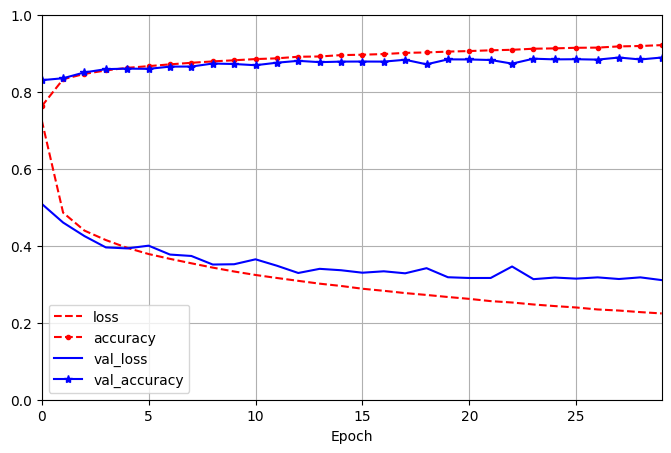

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
                                   style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3263 - accuracy: 0.8842


[0.32634687423706055, 0.8841999769210815]

### Using the model to make predictions

In [23]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 99ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [24]:
import numpy as np

y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [25]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [26]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## Building a Regression MLP Using the Sequential API

In [27]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

model = tf.keras.Sequential([norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test, rmse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
1719/1719 [==============================] - 5s 3ms/step - loss: 8.6449 - root_mean_squared_error: 2.9403 - val_loss: 8.4202 - val_root_mean_squared_error: 2.9019
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.3017 - root_mean_squared_error: 2.8813 - val_loss: 8.3922 - val_root_mean_squared_error: 2.8971
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2849 - root_mean_squared_error: 2.8784 - val_loss: 8.4066 - val_root_mean_squared_error: 2.8996
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2789 - root_mean_squared_error: 2.8773 - val_loss: 8.4523 - val_root_mean_squared_error: 2.9074
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2700 - root_mean_squared_error: 2.8758 - val_loss: 8.3931 - val_root_mean_squared_error: 2.8973
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2598 - root_mean_squared_error: 2.8740 - val_loss: 8

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 28, 28)           57        
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 28, 50)            1450      
                                                                 
 dense_4 (Dense)             (None, 28, 50)            2550      
                                                                 
 dense_5 (Dense)             (None, 28, 50)            2550      
                                                                 
 dense_6 (Dense)             (None, 28, 1)             51        
                                                                 
Total params: 6,658
Trainable params: 6,601
Non-trainable params: 57
___________________________________________________

## Building Complex Models Using the Functional API